In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from encode_data import *
from midi_data import *

In [3]:
from tqdm import tqdm

## Encode music21 stream to text representation and back

### Load midi data

In [4]:
path = Path('data/midi')
csv_path = path/'metadata'

In [5]:
import pandas as pd

In [40]:
df = pd.read_csv(path/'metadata/combined.csv', index_col=0); df.head()

,artist,bpm,genres,ht_bpm,ht_key,ht_mode,ht_time_signature,inferred_key,inferred_keyc,instruments,...,midi_keyc,midi_title,original_path,parts,seconds,section,song_url,source,time_signature,title
0,wayne-sharpe,128.0,NaN,128.0,C,1.0,4.0,C major,C major,"Piano,Piano",...,data/midi/transposed/hooktheory/pianoroll/w/wa...,yu-gi-oh3,data/midi/midi_sources/hooktheory/pianoroll/w/...,"intro,chorus",15.000000,chorus,https://www.hooktheory.com/theorytab/view/wayn...,hooktheory,4/4,yu-gi-oh-theme-song
1,weezer,NaN,NaN,128.0,C,NaN,4.0,NaN,NaN,NaN,...,NaN,My New Song,data/midi/midi_sources/hooktheory/pianoroll/w/...,intro-and-verse,NaN,intro-and-verse,https://www.hooktheory.com/theorytab/view/weez...,hooktheory,NaN,beverly-hills
2,wayne-sharpe,85.0,NaN,85.0,C,1.0,3.0,C major,C major,Piano,...,data/midi/transposed/hooktheory/pianoroll/w/wa...,yu-gi-oh,data/midi/midi_sources/hooktheory/pianoroll/w/...,"intro,chorus",25.411765,intro,https://www.hooktheory.com/theorytab/view/wayn...,hooktheory,3/4,yu-gi-oh-theme-song
3,woodentoaster,197.0,"Alt-Country,Hip-Hop/Rap",197.0,D,6.0,4.0,D minor,D minor,"Piano,Piano",...,data/midi/transposed/hooktheory/pianoroll/w/wo...,Nightmare Night,data/midi/midi_sources/hooktheory/pianoroll/w/...,"chorus,instrumental",9.746193,instrumental,https://www.hooktheory.com/theorytab/view/wood...,hooktheory,4/4,nightmare-night
4,weezer,93.0,Rock,93.0,A,1.0,4.0,F# minor,F# minor,"Piano,Piano",...,data/midi/transposed/hooktheory/pianoroll/w/we...,Weezer - Fall Together,data/midi/midi_sources/hooktheory/pianoroll/w/...,chorus,10.322581,chorus,https://www.hooktheory.com/theorytab/view/weez...,hooktheory,4/4,fall-together-


In [41]:
enr = 'data/midi/transposed/freemidi/genre-dance-eletric/Enrique Iglesias - Experiencia Religiosa.mid'

In [42]:
df.loc[df.midi_keyc == enr]

,artist,bpm,genres,ht_bpm,ht_key,ht_mode,ht_time_signature,inferred_key,inferred_keyc,instruments,...,midi_keyc,midi_title,original_path,parts,seconds,section,song_url,source,time_signature,title
20,Enrique Iglesias,114.0,dance,NaN,NaN,NaN,NaN,F major,F major,"Flute,Piano,Electric Bass,Electric Organ,Voice",...,data/midi/transposed/freemidi/genre-dance-elet...,NaN,NaN,NaN,244.210526,NaN,NaN,freemidi,4/4,Experiencia Religiosa


In [7]:
df_filtered = df.loc[df['time_signature'] == '4/4'][18000:19000]; df_filtered.shape

(1000, 22)

In [8]:
from data_sources import process_parallel

In [9]:
def transcribe_file(idxrow):
    idx,row = idxrow
    midi_file = row.midi_keyc
    if not midi_file: return idx,None
    out_file = Path(midi_file.replace('/transposed/', '/transcribed_allcomp/')).with_suffix('.txt')
    out_file.parent.mkdir(parents=True, exist_ok=True)
    if out_file.exists(): return idx,str(out_file)
    seq = midi2seq(midi_file)
    string_repr = seq2str(seq)
    with open(out_file, 'w') as tf:
        tf.write(string_repr)
    return idx,str(out_file)

In [26]:
for r in df_filtered.iterrows():
    transcribe_file(r)

KeyError: 139619093464456

In [27]:
%debug

> /home/ubuntu/midi_generator/encode_data.py(118)note_data()
    116     def note_data(pitch, note):
    117         inst_id = note.activeSite.getInstrument().id
--> 118         iidx = inst2idx[inst_id]
    119         return (pitch.midi, round(note.offset*sample_freq), round(note.duration.quarterLength*sample_freq), iidx)
    120 

ipdb> note
<music21.note.Note B>
ipdb> up
> /home/ubuntu/midi_generator/encode_data.py(122)stream2chordarr()
    120 
    121     for n in s.recurse().addFilter(noteFilter):
--> 122         notes.append(note_data(n.pitch, n))
    123 
    124     for c in s.recurse().addFilter(chordFilter):

ipdb> up
> /home/ubuntu/midi_generator/encode_data.py(89)midi2seq()
     87     "Converts midi file to string representation for language model"
     88     stream = file2stream(midi_file) # 1.
---> 89     s_arr = stream2chordarr(stream) # 2.
     90     return chordarr2seq(s_arr) # 3.
     91 

ipdb> midi_file
'data/midi/transposed/freemidi/genre-dance-eletric/Enrique 

In [12]:
s = file2stream('data/midi/transposed/freemidi/genre-dance-eletric/Enrique Iglesias - Experiencia Religiosa.mid')

In [ ]:
s.get

In [62]:
list(s.flat)

[<music21.instrument.Flute Flute>,
 <music21.instrument.Piano Piano>,
 <music21.instrument.ElectricBass Electric Bass>,
 <music21.instrument.ElectricOrgan Electric Organ>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Vocalist Voice>,
 <music21.tempo.MetronomeMark Quarter=114.0>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.meter.TimeSignature 4/4>,
 <music21.note.Rest rest>,
 <music21

In [68]:
s.flat[100].midiChannel

AttributeError: 'Note' object has no attribute 'midiChannel'

In [44]:
s2 = music21.instrument.partitionByInstrument(s)

In [ ]:
mf = music21.midi.MidiFile()
mf.open(enr)
mf.read()
mf.close()

In [57]:
s = music21.midi.translate.midiFileToStream(mf)

In [72]:
mf.tracks = [t for t in mf.tracks if t.getChannels()[-1] != 10]

In [73]:
mf

<MidiFile 16 tracks
  <MidiTrack 0 -- 32 events
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent SEQUENCE_TRACK_NAME, t=None, track=0, channel=None, data=b'Experiencia religiosa'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent SEQUENCE_TRACK_NAME, t=None, track=0, channel=None, data=b'Enrique Iglesias'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent TEXT_EVENT, t=None, track=0, channel=None, data=b'SAMUELLUIS@AOL.COM\n'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent TIME_SIGNATURE, t=None, track=0, channel=None, data=b'\x04\x02\x18\x08'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent KEY_SIGNATURE, t=None, track=0, channel=None, data=b'\x00\x00'>
    <MidiEvent DeltaTime, t=0, track=0, channel=None>
    <MidiEvent SET_TEMPO, t=None, track=0, channel=None, data=b'\x08\x07\xec'>
    <MidiEvent DeltaTime, t=960, track=0, channel=None>
    <MidiEvent MARKER, t=None, track=0, channel

In [71]:
[t.getChannels()[-1] for t in mf.tracks]

[None, 1, 2, 3, 4, 5, 6, 7, 8, 10, None, None, None, None, None, None, None]

In [66]:
t.getChannels()

[None]

In [48]:
list(s2.flat.getInstruments())

[<music21.instrument.Flute Flute>,
 <music21.instrument.Piano Piano>,
 <music21.instrument.ElectricBass Electric Bass>,
 <music21.instrument.ElectricOrgan Electric Organ>,
 <music21.instrument.Instrument >,
 <music21.instrument.Vocalist Voice>]

In [47]:
s2.show('text')

{0.0} <music21.stream.Part Flute>
    {0.0} <music21.instrument.Flute Flute>
    {0.0} <music21.tempo.MetronomeMark Quarter=114.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest rest>
    {9.0} <music21.note.Note D>
    {10.0} <music21.note.Note G>
    {10.5} <music21.note.Note E>
    {11.0} <music21.note.Note D>
    {11.3333} <music21.note.Note G>
    {14.0} <music21.note.Note G>
    {14.5} <music21.note.Note D>
    {15.3333} <music21.note.Note B>
    {16.0} <music21.note.Note C>
    {17.0} <music21.note.Note G>
    {17.5} <music21.note.Note G>
    {25.0} <music21.note.Note E>
    {25.0} <music21.note.Note F#>
    {25.5} <music21.note.Note E>
    {26.0} <music21.note.Note F#>
    {26.3333} <music21.note.Note E>
    {26.75} <music21.note.Note D>
    {27.3333} <music21.note.Note F#>
    {28.5} <music21.note.Note D>
    {30.5} <music21.note.Note E>
    {31.0} <music21.note.Note C>
    {31.5} <music21.note.Note B>
    {32.66

In [25]:
list(s.flat.getInstruments())

[<music21.instrument.Flute Flute>,
 <music21.instrument.Piano Piano>,
 <music21.instrument.ElectricBass Electric Bass>,
 <music21.instrument.ElectricOrgan Electric Organ>,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Instrument >,
 <music21.instrument.Vocalist Voice>]

In [51]:
i = list(s.flat.getInstruments())[0]

In [53]:
i.

In [55]:
[(i.id, i.midiChannel) for i in list(s.flat.getInstruments())]

[(139619232067144, None),
 (139619153935664, None),
 (139619152851184, None),
 (139619152405224, None),
 (139619151523064, None),
 (139619151271976, None),
 (139619151014880, None),
 (139619150579584, None)]

In [21]:
s.show('text')

{0.0} <music21.stream.Part 0x7efba2cb76a0>
    {0.0} <music21.instrument.Flute Flute>
    {0.0} <music21.tempo.MetronomeMark Quarter=114.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7efb9f227c18>
        {0.0} <music21.note.Rest rest>
        {9.0} <music21.note.Note D>
        {10.0} <music21.note.Note G>
        {10.5} <music21.note.Note E>
        {11.0} <music21.note.Note D>
        {14.0} <music21.note.Note G>
        {15.3333} <music21.note.Note B>
        {17.0} <music21.note.Note G>
        {17.5} <music21.note.Note G>
        {25.0} <music21.note.Note E>
        {25.5} <music21.note.Note E>
        {26.0} <music21.note.Note F#>
        {26.75} <music21.note.Note D>
        {27.3333} <music21.note.Note F#>
        {30.5} <music21.note.Note E>
        {31.5} <music21.note.Note B>
        {32.6667} <music21.note.Note D>
        {41.3333} <music21.note.Note D>
        {42.0} <music21.note.Note G>
        {4

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 1 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 6 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>>, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <musi

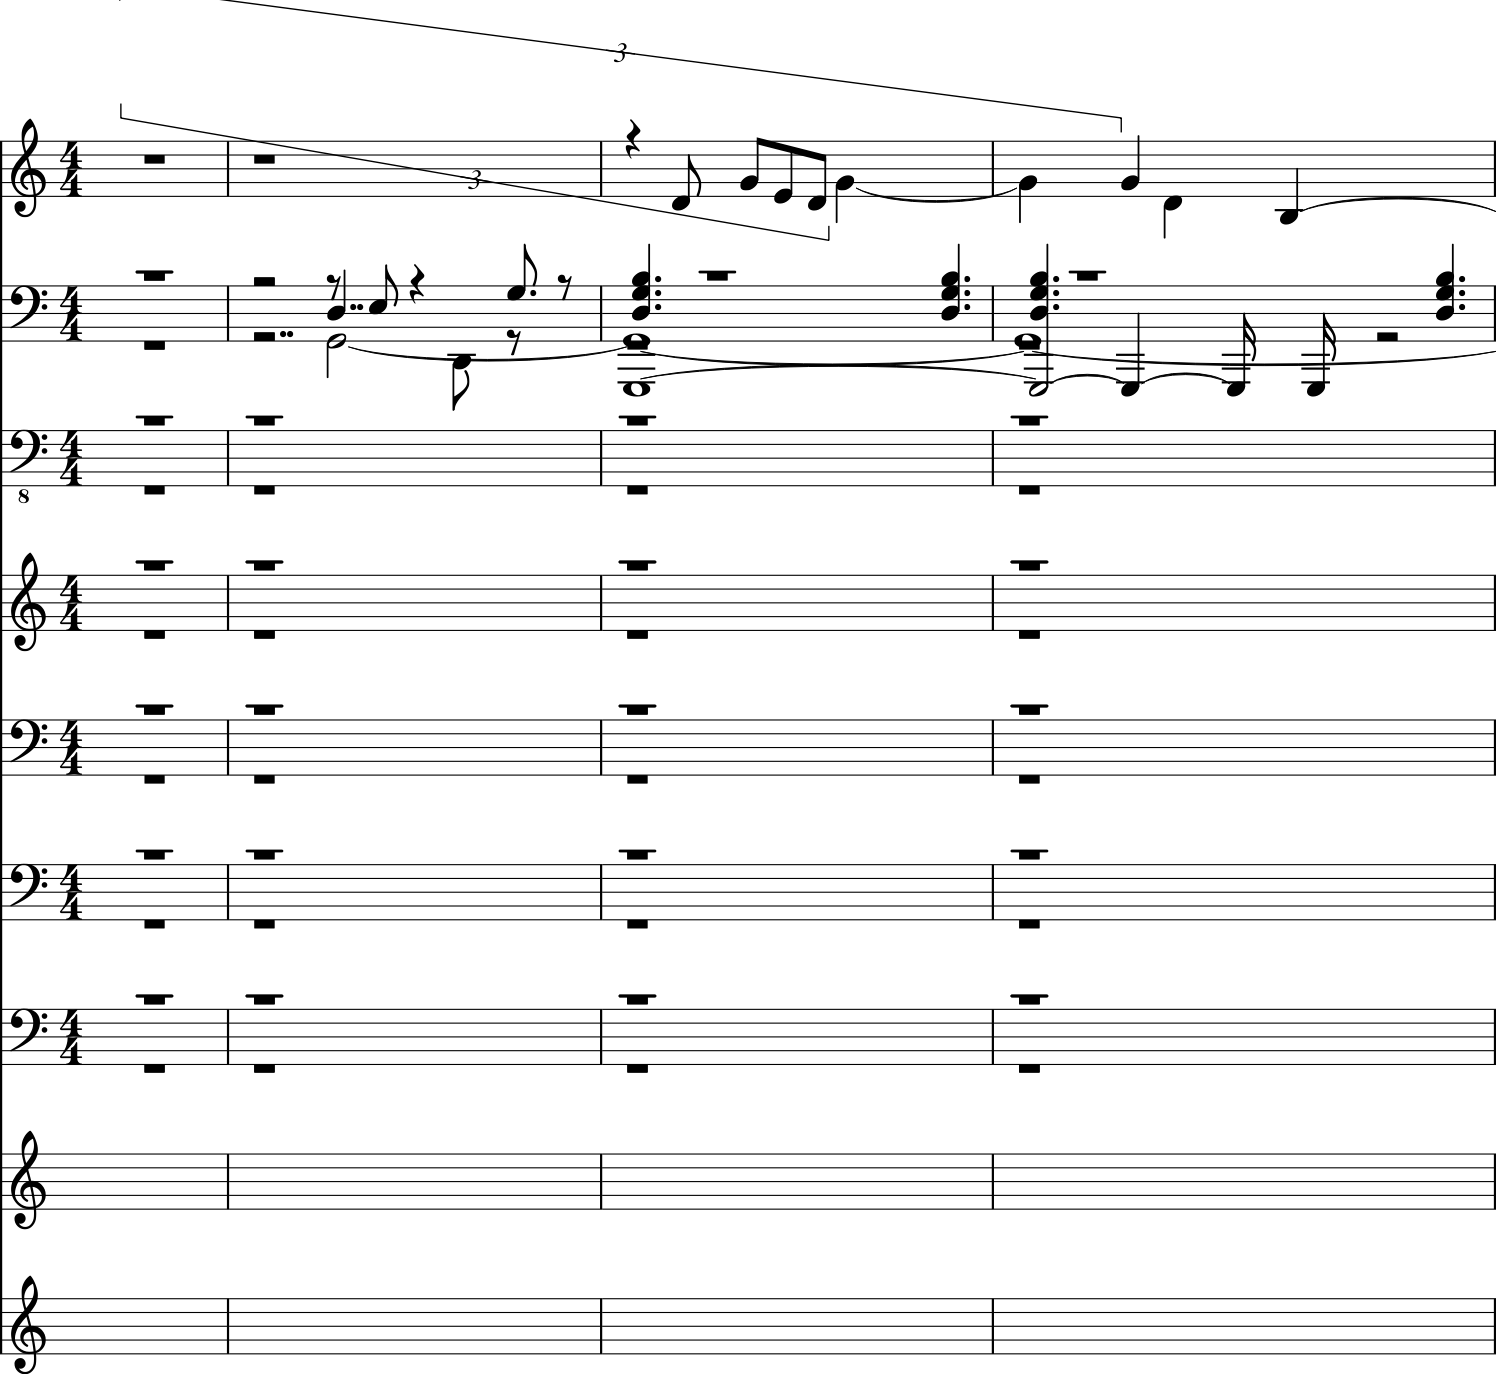

In [19]:
s.show()

In [18]:
s.flat.show('midi')

In [11]:
%debug

> /home/ubuntu/midi_generator/encode_data.py(118)note_data()
    116     def note_data(pitch, note):
    117         inst_id = note.activeSite.getInstrument().id
--> 118         iidx = inst2idx[inst_id]
    119         return (pitch.midi, round(note.offset*sample_freq), round(note.duration.quarterLength*sample_freq), iidx)
    120 

ipdb> up
> /home/ubuntu/midi_generator/encode_data.py(122)stream2chordarr()
    120 
    121     for n in s.recurse().addFilter(noteFilter):
--> 122         notes.append(note_data(n.pitch, n))
    123 
    124     for c in s.recurse().addFilter(chordFilter):

ipdb> up
> /home/ubuntu/midi_generator/encode_data.py(89)midi2seq()
     87     "Converts midi file to string representation for language model"
     88     stream = file2stream(midi_file) # 1.
---> 89     s_arr = stream2chordarr(stream) # 2.
     90     return chordarr2seq(s_arr) # 3.
     91 

ipdb> midi_file
'data/midi/transposed/freemidi/genre-dance-eletric/Enrique Iglesias - Experiencia Religiosa.

In [10]:
process_parallel(transcribe_file, df_filtered.iterrows(), total=df_filtered.shape[0])

KeyboardInterrupt: 

In [9]:
# f1 = '../data/midi/transcribedc_v1/hooktheory/pianoroll/w/wayne-sharpe/yu-gi-oh-theme-song/chorus_key.txt'
# with open(f1, 'r') as f: 
#     print(f.read())

In [51]:
tdf = pd.DataFrame(data={'transcribed_keyc_v1': list(transcribed_files.values())}, index=transcribed_files.keys())

In [52]:
merged_df = df.join(tdf, how='outer')

In [53]:
tdf.shape, df.shape, merged_df.shape

((11531, 1), (12703, 18), (12703, 19))

In [56]:
merged_df.to_csv('hooktheory_metadata_transcribed.csv'); merged_df.head()

,parts,ht_mode,ht_key,original_path,genres,seconds,section,midi_keyc,time_signature,ht_time_signature,ht_bpm,instruments,bpm,midi_title,song_url,artist,inferred_key,inferred_keyc,transcribed_keyc_v1
0,"['intro', 'chorus']",1.0,C,../data/midi/hooktheory/pianoroll/w/wayne-shar...,[],15.000000,chorus,../data/midi/transposed/hooktheory/pianoroll/w...,4/4,4,128,"['Piano', 'Piano']",128.0,yu-gi-oh3,https://www.hooktheory.com/theorytab/view/wayn...,wayne-sharpe,C major,C major,../data/midi/transcribedc_v1/hooktheory/pianor...
1,"['intro', 'chorus']",1.0,C,../data/midi/hooktheory/pianoroll/w/wayne-shar...,[],25.411765,intro,../data/midi/transposed/hooktheory/pianoroll/w...,3/4,3,85,['Piano'],85.0,yu-gi-oh,https://www.hooktheory.com/theorytab/view/wayn...,wayne-sharpe,C major,C major,NaN
2,['chorus'],6.0,D,../data/midi/hooktheory/pianoroll/w/what-a-day...,['Jazz'],10.000000,chorus,../data/midi/transposed/hooktheory/pianoroll/w...,4/4,4,96,"['Piano', 'Piano']",96.0,kiefer,https://www.hooktheory.com/theorytab/view/what...,what-a-day,A minor,A minor,../data/midi/transcribedc_v1/hooktheory/pianor...
3,"['verse', 'pre-chorus', 'chorus']",6.0,D,../data/midi/hooktheory/pianoroll/w/whiteflame...,"['J-Pop', 'Pop']",25.263158,chorus,../data/midi/transposed/hooktheory/pianoroll/w...,4/4,4,152,"['Piano', 'Piano']",152.0,Senbonzakura,https://www.hooktheory.com/theorytab/view/whit...,whiteflame,D minor,D minor,../data/midi/transcribedc_v1/hooktheory/pianor...
4,"['verse', 'pre-chorus', 'chorus']",6.0,D,../data/midi/hooktheory/pianoroll/w/whiteflame...,"['J-Pop', 'Pop']",12.631579,verse,../data/midi/transposed/hooktheory/pianoroll/w...,4/4,4,152,"['Piano', 'Piano']",152.0,Senbonzakura,https://www.hooktheory.com/theorytab/view/whit...,whiteflame,D minor,D minor,../data/midi/transcribedc_v1/hooktheory/pianor...
